
# <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#FF5C19; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF5C19">Import Necessary Modules</p>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


# <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#FF5C19; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF5C19">Load Dataset</p>

In [ ]:
df = pd.read_csv('Emotion_classify_Data.csv')
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear




# <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#FF5C19; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF5C19">Exploratory Data Analysis(EDA)</p>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [ ]:
df.columns

Index(['Comment', 'Emotion'], dtype='object')

In [ ]:
df.describe()

,Comment,Emotion
count,5937,5937
unique,5934,3
top,i feel like a tortured artist when i talk to her,anger
freq,2,2000


In [ ]:
df.isnull().sum()

Comment    0
Emotion    0
dtype: int64

**There is no null value present in the dataset**

In [ ]:
df['Emotion'].value_counts()

anger    2000
joy      2000
fear     1937
Name: Emotion, dtype: int64

<Axes: xlabel='Emotion', ylabel='count'>

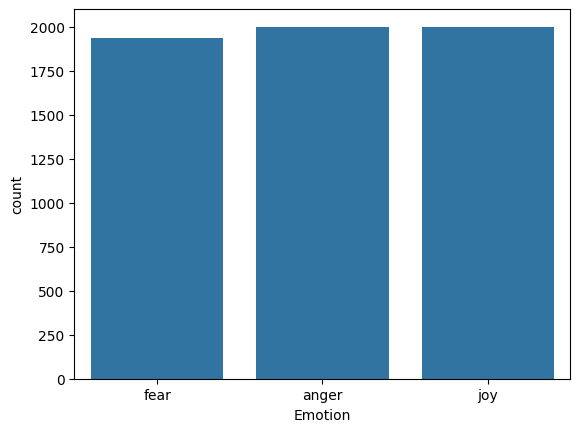

In [ ]:
sns.countplot(x = df['Emotion'])



# <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#FF5C19; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF5C19">Data Preprocessing</p>


In [ ]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
import subprocess

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word not in stop_words]

    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    tokens = [stemmer.stem(word) for word in tokens]

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

df['Preprocessed_Comment'] = df['Comment'].apply(preprocess_text)

df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Comment,Emotion,Preprocessed_Comment
0,i seriously hate one subject to death but now ...,fear,serious hate one subject death feel reluct drop
1,im so full of life i feel appalled,anger,im full life feel appal
2,i sit here to write i start to dig out my feel...,fear,sit write start dig feel think afraid accept p...
3,ive been really angry with r and i feel like a...,joy,ive realli angri r feel like idiot trust first...
4,i feel suspicious if there is no one outside l...,fear,feel suspici one outsid like raptur happen someth





# <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#FF5C19; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF5C19">Wordcloud</p>


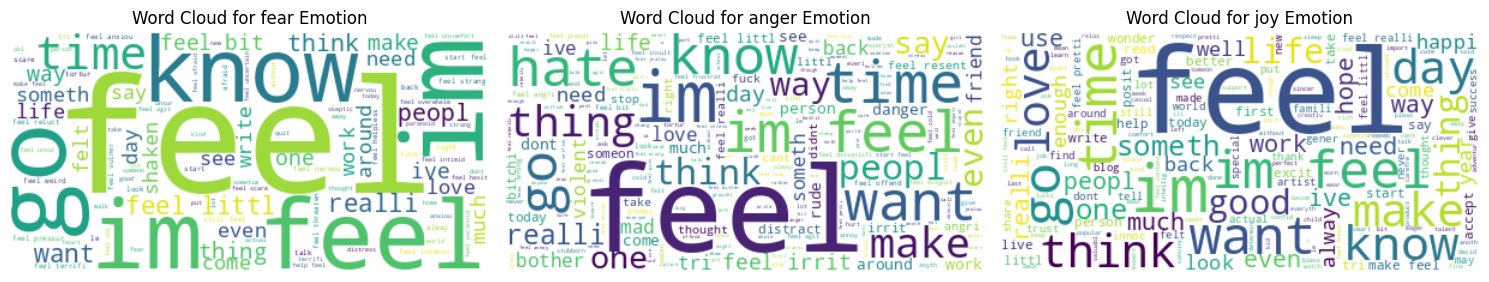

In [ ]:
from wordcloud import WordCloud


# Function to generate and display a word cloud for a given emotion
def generate_wordcloud(emotion, ax):
    # Combine preprocessed text for the specified emotion
    text_for_emotion = ' '.join(df[df['Emotion'] == emotion]['Preprocessed_Comment'])

    # Generate word cloud
    wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text_for_emotion)

    # Display the word cloud in the specified subplot
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Word Cloud for {emotion} Emotion')
    ax.axis('off')

# List of unique emotions in the DataFrame
unique_emotions = df['Emotion'].unique()

# Set up subplots
num_emotions = len(unique_emotions)
fig, axes = plt.subplots(1, num_emotions, figsize=(15, 5))

# Generate word clouds for each emotion and display them side by side
for i, emotion in enumerate(unique_emotions):
    generate_wordcloud(emotion, axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()






# <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#FF5C19; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF5C19">Label Encoder</p>


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Emotion' column into numerical values
df['Emotion_num'] = label_encoder.fit_transform(df['Emotion'])

# Display the first 5 rows of the DataFrame
print(df.head(5))


                                             Comment Emotion  \
0  i seriously hate one subject to death but now ...    fear   
1                 im so full of life i feel appalled   anger   
2  i sit here to write i start to dig out my feel...    fear   
3  ive been really angry with r and i feel like a...     joy   
4  i feel suspicious if there is no one outside l...    fear   

                                Preprocessed_Comment  Emotion_num  
0    serious hate one subject death feel reluct drop            1  
1                            im full life feel appal            0  
2  sit write start dig feel think afraid accept p...            1  
3  ive realli angri r feel like idiot trust first...            2  
4  feel suspici one outsid like raptur happen someth            1  







# <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#FF5C19; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF5C19">Train Test Ratio</p>


In [ ]:
# Split the data into features (X) and target variable (y)
X = df['Preprocessed_Comment']
y = df['Emotion_num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)








# <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#FF5C19; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF5C19">TF-IDF</p>


In [ ]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform the training and testing data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)







# <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#FF5C19; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF5C19">Machine Learning Model</p>







## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#FF5C19; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF5C19">1. MultinomialNB</p>


In [ ]:
# Initialize the Naive Bayes classifier
naive_bayes = MultinomialNB()

# Train the classifier on the training data
naive_bayes.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred = naive_bayes.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Confusion Matrix
print('\nConfusion Matrix:\n', confusion_matrix(y_test, y_pred))

Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       600
           1       0.92      0.85      0.88       614
           2       0.89      0.90      0.89       568

    accuracy                           0.89      1782
   macro avg       0.89      0.89      0.89      1782
weighted avg       0.89      0.89      0.89      1782


Confusion Matrix:
 [[558  20  22]
 [ 51 521  42]
 [ 36  23 509]]








## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#FF5C19; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF5C19">2.Logistic Regression </p>


In [ ]:

logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)
y_pred_logreg = logreg.predict(X_test_tfidf)

# Evaluate the models

print(f'Accuracy: {accuracy_score(y_test, y_pred_logreg):.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_logreg))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_logreg))


Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       600
           1       0.94      0.88      0.91       614
           2       0.90      0.95      0.92       568

    accuracy                           0.92      1782
   macro avg       0.92      0.92      0.92      1782
weighted avg       0.92      0.92      0.92      1782

Confusion Matrix:
 [[563  15  22]
 [ 37 542  35]
 [ 12  19 537]]









## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#FF5C19; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF5C19">3.Random Forest  </p>


In [ ]:

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)
y_pred_rf = rf_classifier.predict(X_test_tfidf)



print(f'Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_rf))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))




Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       600
           1       0.95      0.92      0.93       614
           2       0.95      0.95      0.95       568

    accuracy                           0.94      1782
   macro avg       0.94      0.94      0.94      1782
weighted avg       0.94      0.94      0.94      1782

Confusion Matrix:
 [[572  11  17]
 [ 42 562  10]
 [ 12  16 540]]









## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#FF5C19; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF5C19">4.XGBoost  </p>


In [ ]:

xgb_classifier = xgb.XGBClassifier(objective="multi:softmax", num_class=len(df['Emotion_num'].unique()), random_state=42)
xgb_classifier.fit(X_train_tfidf, y_train)
y_pred_xgb = xgb_classifier.predict(X_test_tfidf)


print(f'Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_xgb))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_xgb))


Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       600
           1       0.96      0.90      0.93       614
           2       0.95      0.95      0.95       568

    accuracy                           0.93      1782
   macro avg       0.94      0.93      0.93      1782
weighted avg       0.94      0.93      0.93      1782

Confusion Matrix:
 [[572   8  20]
 [ 52 554   8]
 [ 13  16 539]]









## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#FF5C19; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF5C19">5.LSTM   </p>


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into features (X) and target variable (y)
X = df['Preprocessed_Comment']
y = df['Emotion_num']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Tokenize and pad the sequences
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=50, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=50, padding='post', truncating='post')

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=50))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_pad, y_train, epochs=25, batch_size=32, validation_split=0.2)

# Evaluate the LSTM model
y_pred_lstm_prob = model.predict(X_test_pad)
y_pred_lstm = np.argmax(y_pred_lstm_prob, axis=1)  # Get the index of the maximum probability for each sample
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print("LSTM Accuracy:", accuracy_lstm)
print('Classification Report:\n', classification_report(y_test, y_pred_lstm))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_lstm))

Epoch 1/25
119/119 [==============================] - 7s 39ms/step - loss: 1.0998 - accuracy: 0.3253 - val_loss: 1.0985 - val_accuracy: 0.3316
Epoch 2/25
119/119 [==============================] - 4s 33ms/step - loss: 1.0993 - accuracy: 0.3304 - val_loss: 1.0985 - val_accuracy: 0.3316
Epoch 3/25
119/119 [==============================] - 7s 61ms/step - loss: 1.0990 - accuracy: 0.3298 - val_loss: 1.0988 - val_accuracy: 0.3316
Epoch 4/25
119/119 [==============================] - 4s 38ms/step - loss: 1.0988 - accuracy: 0.3319 - val_loss: 1.0975 - val_accuracy: 0.3505
Epoch 5/25
119/119 [==============================] - 5s 44ms/step - loss: 0.9697 - accuracy: 0.5288 - val_loss: 0.9948 - val_accuracy: 0.5168
Epoch 6/25
119/119 [==============================] - 4s 35ms/step - loss: 0.8890 - accuracy: 0.5778 - val_loss: 0.8714 - val_accuracy: 0.5863
Epoch 7/25
119/119 [==============================] - 5s 39ms/step - loss: 0.7012 - accuracy: 0.6354 - val_loss: 0.7909 - val_accuracy: 0.6179








## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#FF5C19; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF5C19">6.BiLSTM   </p>


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into features (X) and target variable (y)
X = df['Preprocessed_Comment']
y = df['Emotion_num']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Tokenize and pad the sequences
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=50, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=50, padding='post', truncating='post')

# Build the BiLSTM model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=50))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_pad, y_train, epochs=25, batch_size=32, validation_split=0.2)

# Evaluate the BiLSTM model
y_pred_bilstm_prob = model.predict(X_test_pad)
y_pred_bilstm = np.argmax(y_pred_bilstm_prob, axis=1)  # Get the index of the maximum probability for each sample
accuracy_bilstm = accuracy_score(y_test, y_pred_bilstm)
print("BiLSTM Accuracy:", accuracy_bilstm)
print('Classification Report:\n', classification_report(y_test, y_pred_bilstm))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_bilstm))


Epoch 1/25
119/119 [==============================] - 15s 80ms/step - loss: 1.0229 - accuracy: 0.4885 - val_loss: 0.7503 - val_accuracy: 0.7611
Epoch 2/25
119/119 [==============================] - 8s 68ms/step - loss: 0.3105 - accuracy: 0.9197 - val_loss: 0.3158 - val_accuracy: 0.9042
Epoch 3/25
119/119 [==============================] - 6s 54ms/step - loss: 0.0842 - accuracy: 0.9779 - val_loss: 0.3060 - val_accuracy: 0.9084
Epoch 4/25
119/119 [==============================] - 8s 65ms/step - loss: 0.0385 - accuracy: 0.9903 - val_loss: 0.3187 - val_accuracy: 0.9000
Epoch 5/25
119/119 [==============================] - 8s 65ms/step - loss: 0.0232 - accuracy: 0.9945 - val_loss: 0.3517 - val_accuracy: 0.8979
Epoch 6/25
119/119 [==============================] - 9s 75ms/step - loss: 0.0146 - accuracy: 0.9982 - val_loss: 0.4232 - val_accuracy: 0.8863
Epoch 7/25
119/119 [==============================] - 8s 70ms/step - loss: 0.0122 - accuracy: 0.9976 - val_loss: 0.4480 - val_accuracy: 0.905








# <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#FF5C19; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF5C19">Conclusion
 </p>


## Even though BiLSTM performs better than LSTM, Random Forest Model still performs the best with the highest accuracy








# <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#FF5C19; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF5C19">Further Scope
 </p>









## <p style="font-family:JetBrains Mono; font-weight:normal; letter-spacing: 2px; color:#FF5C19; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF5C19">BiLSTM Hyperparameter tuning   </p>


In [ ]:
!pip install keras-tuner
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch

# Define a function to create the BiLSTM model
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=max_words, output_dim=32, input_length=50))
    model.add(Bidirectional(LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32), activation='tanh')))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # number of hyperparameter combinations to try
    executions_per_trial=1,  # number of models to train for each trial
    directory='my_dir',  # directory to store the results
    project_name='bilstm_hyperparameters'  # name for the project
)

# Perform hyperparameter search
tuner.search(X_train_pad, y_train, epochs=25, validation_split=0.2, callbacks=[EarlyStopping(patience=3)])

# Get the best hyperparameters
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]
print(f"Best hyperparameters: {best_hp.values}")


Trial 5 Complete [00h 01m 06s]
val_accuracy: 0.8989473581314087

Best val_accuracy So Far: 0.9273684024810791
Total elapsed time: 00h 06m 09s
Best hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7bbdb8505330>


In [ ]:
y_pred_bilstm_prob = best_model.predict(X_test_pad)
y_pred_bilstm = np.argmax(y_pred_bilstm_prob, axis=1)  # Get the index of the maximum probability for each sample
accuracy_bilstm = accuracy_score(y_test, y_pred_bilstm)
print("BiLSTM Accuracy:", accuracy_bilstm)
print('Classification Report:\n', classification_report(y_test, y_pred_bilstm))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_bilstm))


38/38 [==============================] - 2s 20ms/step
BiLSTM Accuracy: 0.9351851851851852
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.93       400
           1       0.93      0.96      0.94       388
           2       0.92      0.95      0.93       400

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188

Confusion Matrix:
 [[356  15  29]
 [  9 374   5]
 [  4  15 381]]


## After hyperparameters are tuned BiLSTM is close to Random Forest